
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Machine Learning & Classification <br>

____

## Logistic Regression (50 points)

In this notebook, we will explore the fundamentals of classification in machine learning by implementing Logistic Regression from scratch, step by step.

#### Libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### From scratch implementation (20 points)

- **Sigmoid Function**: Logistic Regression models the probability of a class label as:  
  
  $$
  P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = X \cdot w
  $$

  where $ w $ is the weight vector, $ X $ is the feature matrix, and $ \sigma(z) $ maps the input to a value between 0 and 1.

- **Binary Cross-Entropy Loss**: To train the model, we minimize the binary cross-entropy loss:  

  $$
  \mathcal{L} = -\frac{1}{n} \sum_{i=1}^n \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
  $$  

  Here, $ y_i $ is the true label, and $ \hat{y}_i $ is the predicted probability.

- **Gradient Descent (GD)**: To optimize the weights, we use Gradient Descent, an iterative algorithm that updates the weights in the direction of the negative gradient of the loss:  

  $$
  w \gets w - \alpha \cdot \nabla \mathcal{L}
  $$  

  where $ \alpha $ is the learning rate and $ \nabla \mathcal{L} $ is the gradient.



The class `LogisticRegressionGD` implements logistic regression with the following features:
- Binary classification using the sigmoid function.
- Training using gradient descent with a configurable learning rate, number of steps, and convergence tolerance.
- Validation accuracy tracking and loss history for monitoring training progress.
- Prediction capability and a confusion matrix visualization.

Let’s now implement this step by step and evaluate its performance on a classification dataset.

In [37]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.1, n_steps=1000, tolerance=1e-6):
        """
        Initialize the parameters for the Logistic Regression model.
        """
        self.learning_rate = learning_rate
        self.n_steps = n_steps
        self.tolerance = tolerance
        self.weights = None
        self.loss_history = []

    def sigmoid(self, z):
        """
        Apply the sigmoid function to scalar, vector, or matrix.
        Prevent overflow by clamping the input values of z.
        """
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))


    def compute_loss(self, X, y):
        """
        Compute the binary cross-entropy loss for the current weights.
        """
        n = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
        return loss

    def compute_gradient(self, X, y):
        """
        Compute the gradient of the loss function with respect to the weights.
        """
        predictions = self.sigmoid(np.dot(X, self.weights))
        gradient = np.dot(X.T, (predictions - y)) / X.shape[0]
        return gradient

    def test_accuracy(self, X_test, y_test):
        """
        Compute the accuracy of the model on test data.
        """
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return accuracy

    def fit(self, X_train, y_train, X_val, y_val):
        """
        Train the Logistic Regression model using gradient descent.
        """
        n_features = X_train.shape[1]
        self.weights = np.zeros(n_features)
        self.validation_accuracies = []

        for step in range(1, self.n_steps + 1):
          gradient = self.compute_gradient(X_train, y_train)
          self.weights -= self.learning_rate * gradient

          loss = self.compute_loss(X_train, y_train)
          self.loss_history.append(loss)

          val_accuracy = self.test_accuracy(X_val, y_val)
          self.validation_accuracies.append(val_accuracy)

          if step % 100 == 0 or step == self.n_steps:
              print(f"Step {step}: Loss = {loss:.4f}, Validation Accuracy = {val_accuracy:.4f}")

          if step > 1 and abs(self.loss_history[-2] - self.loss_history[-1]) < self.tolerance:
              print(f"Converged at step {step}.")
              break


    def predict(self, X):
        """
        Predict binary labels for given data.
        """
        probabilities = self.sigmoid(np.dot(X, self.weights))
        return (probabilities >= 0.5).astype(int)

    def plot_confusion_matrix(self, X_val, y_val, labels):
        """
        Plot the confusion matrix for the validation data using seaborn.
        """
        y_pred = self.predict(X_val)
        cm = confusion_matrix(y_val, y_pred, labels=labels)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

Now that you have implemented the Logistic Regression class, let's test it on a sample dummy dataset and visualize the decision boundary:

Step 100: Loss = 0.0887, Validation Accuracy = 0.9750
Step 200: Loss = 0.0707, Validation Accuracy = 0.9750
Step 300: Loss = 0.0635, Validation Accuracy = 0.9750
Step 400: Loss = 0.0595, Validation Accuracy = 0.9750
Step 500: Loss = 0.0568, Validation Accuracy = 0.9750
Step 600: Loss = 0.0548, Validation Accuracy = 0.9750
Step 700: Loss = 0.0532, Validation Accuracy = 0.9750
Step 800: Loss = 0.0520, Validation Accuracy = 0.9750
Converged at step 876.
Test Accuracy: 98.75%


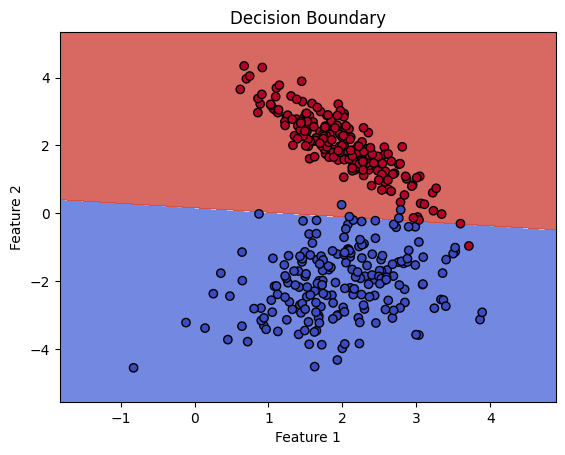

In [38]:
X, y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-5)
model.fit(X_train, y_train, X_val, y_val)

accuracy = model.test_accuracy(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
grid = np.hstack([np.ones((grid.shape[0], 1)), grid])
probs = model.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Towards real numerical datasets (15 points)

With our tools ready, we'll now work with the Breast Cancer dataset from scikit-learn—a classic binary classification dataset commonly used in machine learning. This dataset includes various features describing tumors, along with their corresponding labels (benign or malignant).

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA

In [41]:
data = load_breast_cancer()
X, y = data.data, data.target
print("Features:", data.feature_names)
print("Target Names:", data.target_names)
print("Data Shape:", X.shape)
print("Target Shape:", y.shape)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']
Data Shape: (569, 30)
Target Shape: (569,)


As you are familiar with, adding bias term 1 is necessary as well:

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Since the dataset has a high number of features, we will use dimensionality reduction to make it easier to visualize. For this purpose, we will apply Principal Component Analysis (PCA):

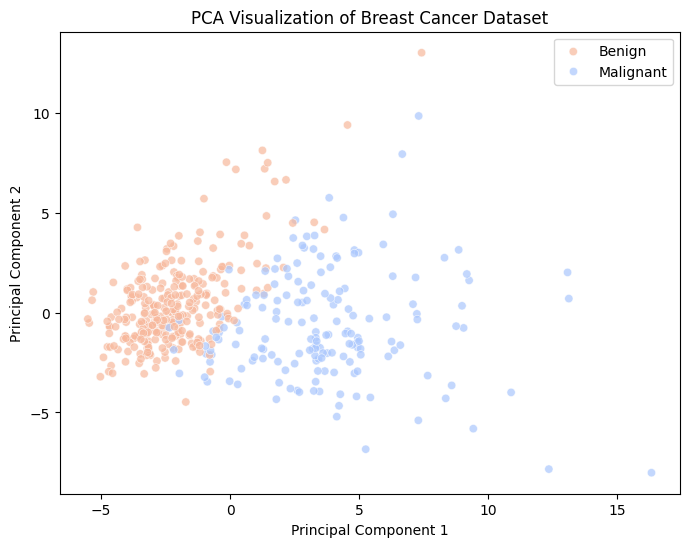

In [43]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm', alpha=0.7)
plt.title("PCA Visualization of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(["Benign", "Malignant"])
plt.show()

Finally, we will train the Logistic Regression model on this dataset. We will visualize the loss reduction during training and evaluate the model's performance using a confusion matrix:

In [44]:
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-7)
model.fit(X_train, y_train, X_test, y_test)

val_accuracy = model.test_accuracy(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Step 100: Loss = 0.1095, Validation Accuracy = 0.9649
Step 200: Loss = 0.0894, Validation Accuracy = 0.9737
Step 300: Loss = 0.0803, Validation Accuracy = 0.9825
Step 400: Loss = 0.0748, Validation Accuracy = 0.9825
Step 500: Loss = 0.0709, Validation Accuracy = 0.9825
Step 600: Loss = 0.0680, Validation Accuracy = 0.9825
Step 700: Loss = 0.0658, Validation Accuracy = 0.9825
Step 800: Loss = 0.0639, Validation Accuracy = 0.9825
Step 900: Loss = 0.0623, Validation Accuracy = 0.9825
Step 1000: Loss = 0.0610, Validation Accuracy = 0.9825
Validation Accuracy: 0.9825


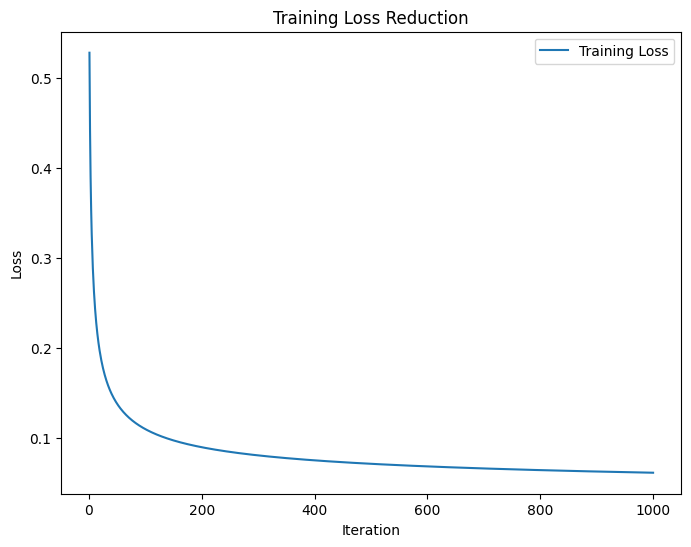

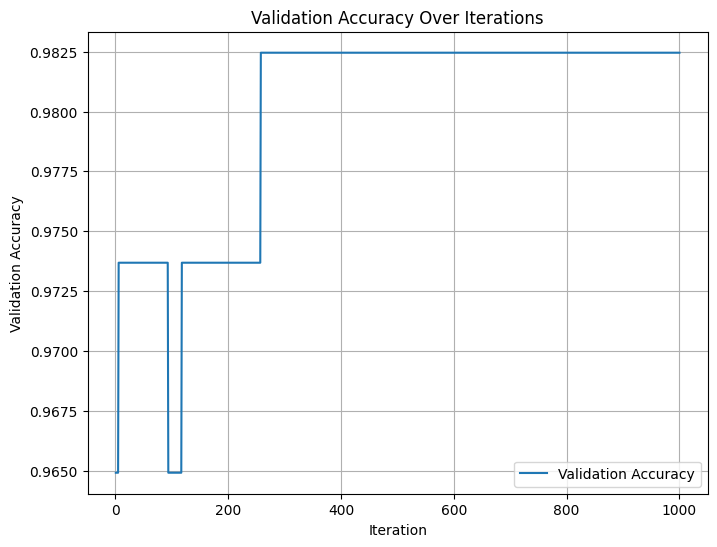

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(model.loss_history) + 1), model.loss_history, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Reduction")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(model.validation_accuracies) + 1), model.validation_accuracies, label='Validation Accuracy')
plt.xlabel("Iteration")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Over Iterations")
plt.legend()
plt.grid()
plt.show()

**Why does the validation accuracy show a slight decrease?**

The slight decrease in validation accuracy could result from overfitting as the model starts to memorize training data patterns, reducing generalization. It might also be due to an inappropriate learning rate, causing fluctuations, or information loss from PCA, which reduces features. Additionally, random variations in the validation set and the absence of early stopping may contribute to this behavior.

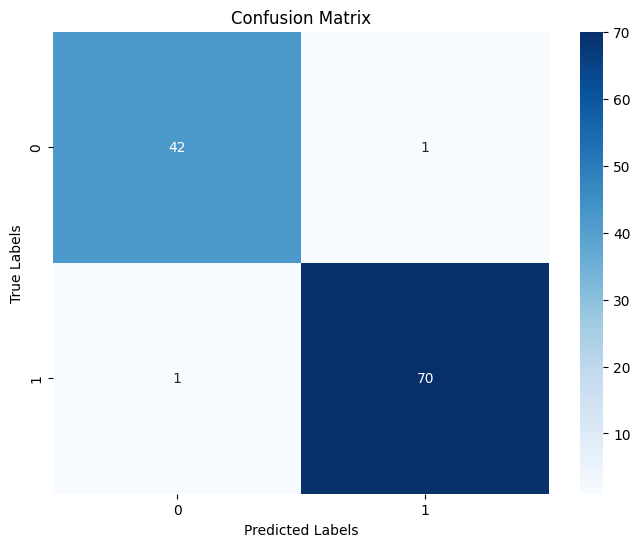

In [46]:
model.plot_confusion_matrix(X_test, y_test, labels=[0, 1])

### Towards real non-numerical datasets (15 points)

Up to this point, you have successfully implemented Logistic Regression from scratch and applied it to a numerical dataset (the Breast Cancer dataset, where all features were numerical).

Now, let’s take it a step further by applying your classifier to a non-numerical dataset. We will use the [Rotten Tomatoes Reviews dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset), a popular dataset for sentiment analysis. This dataset contains movie reviews categorized into two classes: 'rotten' and 'fresh', representing binary sentiment classification.

To work with this dataset, we will first create embedding vectors for the text data. These embeddings will numerically represent each review and allow us to classify them based on their content. The focus will be on building meaningful embeddings that capture the essence of the reviews and using Logistic Regression to perform sentiment classification.

If you're using Google Colab, you can use the following cells to download and unzip the dataset directly. Alternatively, you may choose to download and extract it manually on your device

In [47]:
import os

!mkdir -p ~/.kagglenn

!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
!unzip rotten-tomatoes-movies-and-critic-reviews-dataset.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
License(s): CC0-1.0
 95% 73.0M/77.2M [00:00<00:00, 99.7MB/s]
100% 77.2M/77.2M [00:00<00:00, 95.6MB/s]
Archive:  rotten-tomatoes-movies-and-critic-reviews-dataset.zip
  inflating: rotten_tomatoes_critic_reviews.csv  
  inflating: rotten_tomatoes_movies.csv  


#### Requierments
Please make sure that NLTK is available before proceeding to the next cells

In [48]:
!pip install nltk

#### Libraries

In [49]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from collections import defaultdict

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Since the dataset is quite large, we will focus on a subset of the data by selecting only reviews from top critics and movies with non-NaN review scores. Let's load this subset into a DataFrame and display the first couple of rows

In [50]:
df = pd.read_csv("rotten_tomatoes_critic_reviews.csv")

filtered_df = df[
    (df['review_score'].notna()) &
    (df['review_type'].isin(['Fresh', 'Rotten'])) &
    (df['top_critic'] == True)
]

formatted_df = filtered_df[[
    'rotten_tomatoes_link',
    'critic_name',
    'top_critic',
    'publisher_name',
    'review_type',
    'review_score',
    'review_date',
    'review_content'
]]

print(formatted_df.head())
print(len(filtered_df))


   rotten_tomatoes_link       critic_name  top_critic       publisher_name  \
7             m/0814255  Bill Goodykoontz        True     Arizona Republic   
9             m/0814255      Jim Schembri        True  The Age (Australia)   
11            m/0814255       Roger Moore        True     Orlando Sentinel   
12            m/0814255     David Jenkins        True             Time Out   
21            m/0814255    Stephen Holden        True       New York Times   

   review_type review_score review_date  \
7        Fresh        3.5/5  2010-02-10   
9        Fresh          3/5  2010-02-10   
11      Rotten          2/4  2010-02-10   
12      Rotten          2/5  2010-02-10   
21      Rotten          2/5  2010-02-11   

                                       review_content  
7   Percy Jackson isn't a great movie, but it's a ...  
9   Crammed with dragons, set-destroying fights an...  
11  For what it is and for whom it is intended, it...  
12  Chris Columbus returns to his comfort zone f

To work with the text data, we need to preprocess it. For simplicity, we will perform the following preprocessing steps:
- Convert the text to lowercase
- Remove non-English characters
- Eliminate common English stopwords
- Apply lemmatization using NLTK

Since the dataset is quite large, performing this preprocessing on the CPU may take some time. If you have access to a GPU (either through Google Colab or your local device), we recommend setting the runtime_env to GPU for faster preprocessing. This will significantly speed up the process!

In [51]:
runtime_env = 'GPU' # or CPU

In [52]:
reviews = pd.read_csv("rotten_tomatoes_critic_reviews.csv")

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

if runtime_env == 'GPU':
  import cudf
  import cupy as cp

  def preprocess_text_gpu(text_series):
      text_series = cudf.Series(text_series)
      text_series = text_series.str.lower()
      text_series = text_series.str.replace(r'[^a-z\s]', '', regex=True)
      text_series = text_series.to_pandas()

      processed_texts = []
      for text in text_series:
          tokens = word_tokenize(text)
          tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
          processed_texts.append(' '.join(tokens))
      return processed_texts

  reviews['processed_content'] = preprocess_text_gpu(reviews['review_content'].astype(str))

elif runtime_env == 'CPU':
  def preprocess_text(text):
      text = text.lower()
      text = re.sub(r'[^a-z\s]', '', text)
      tokens = word_tokenize(text)
      tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
      return ' '.join(tokens)

  reviews['processed_content'] = reviews['review_content'].astype(str).apply(preprocess_text)

print(reviews[['review_type', 'review_content', 'processed_content']].head())

  review_type                                     review_content  \
0       Fresh  A fantasy adventure that fuses Greek mythology...   
1       Fresh  Uma Thurman as Medusa, the gorgon with a coiff...   
2       Fresh  With a top-notch cast and dazzling special eff...   
3       Fresh  Whether audiences will get behind The Lightnin...   
4      Rotten  What's really lacking in The Lightning Thief i...   

                                   processed_content  
0  fantasy adventure fuse greek mythology contemp...  
1  uma thurman medusa gorgon coiffure writhing sn...  
2  topnotch cast dazzling special effect tide tee...  
3  whether audience get behind lightning thief ha...  
4  whats really lacking lightning thief genuine s...  


Next, let’s visualize the distribution of the classes in the dataset.

This will help us determine whether the data is balanced between the two classes ('rotten' and 'fresh') or if there is an imbalance that might affect our model's performance.

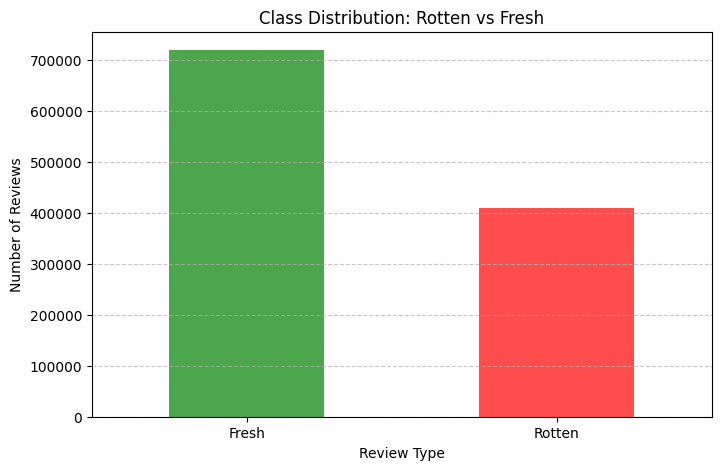

In [53]:
class_counts = reviews['review_type'].value_counts()

plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Class Distribution: Rotten vs Fresh')
plt.xlabel('Review Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In sentiment analysis, we often face the challenge of working with non-numerical data, such as text. To address this, we use [embeddings](https://www.geeksforgeeks.org/what-are-embeddings-in-machine-learning/). An embedding is a method for converting non-numerical data (like words or sentences) into numerical vectors, which can be processed by machine learning algorithms.

Embeddings can be fixed-size or variable-length, and there are many techniques to create them. Some embeddings, like GloVe and Word2Vec, are based on the context of words in a corpus. These methods capture semantic meaning by considering how words relate to each other in context. Alternatively, simpler embeddings, such as Bag-of-Words (BoW), are based on word frequencies within the text.

In this case, we will implement a simple approach. Instead of using pre-trained embeddings, we will create our own using word frequencies within the two classes: Fresh and Rotten.

Here’s the process:

1. Term Frequency (TF): We calculate the frequency of each word in the Fresh and Rotten reviews.
2. Document Frequency (DF): For each word, we calculate the number of reviews (documents) in which it appears.
3. TF-IDF Representation: Each review will be represented as a vector of two numbers:
  - The first number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Rotten class.
  - The second number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Fresh class.
4. Normalization: To ensure consistent scale and improve the performance of our model, we normalize the resulting vector.

This embedding is widely known as [TF-IDF](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/). It helps represent text by emphasizing words that are important to a specific document while reducing the influence of commonly occurring words across the dataset

In [54]:
from collections import defaultdict
import numpy as np

tf = {'Fresh': defaultdict(int), 'Rotten': defaultdict(int)}
df = defaultdict(int)
total_docs = len(reviews)

for _, row in reviews.iterrows():
    words = set(row['processed_content'].split())
    for word in words:
        df[word] += 1
    for word in row['processed_content'].split():
        tf[row['review_type']][word] += 1

tf_idf = {'Fresh': {}, 'Rotten': {}}
for word in df.keys():
    idf = np.log((total_docs) / (df[word] + 1))
    tf_idf['Fresh'][word] = tf['Fresh'][word] * idf
    tf_idf['Rotten'][word] = tf['Rotten'][word] * idf

In [55]:
embedding_vectors = []
for _, row in reviews.iterrows():
    words = row['processed_content'].split()
    fresh_score = sum(tf_idf['Fresh'].get(word, 0) for word in words)
    rotten_score = sum(tf_idf['Rotten'].get(word, 0) for word in words)
    embedding_vectors.append([fresh_score, rotten_score])

embedding_vectors = np.array(embedding_vectors)

Next, we will use the Logistic Regression class that we implemented in previous sections to classify the reviews based on the embeddings we created.

In [56]:
labels = reviews['review_type'].map({'Fresh': 1, 'Rotten': 0}).values

scaler = StandardScaler()
embedding_vectors = scaler.fit_transform(embedding_vectors)

X_train, X_temp, y_train, y_temp = train_test_split(embedding_vectors, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegressionGD(learning_rate=0.1, n_steps=2000, tolerance=1e-6)
model.fit(X_train, y_train, X_val, y_val)

test_accuracy = model.test_accuracy(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Step 100: Loss = 0.6798, Validation Accuracy = 0.6204
Step 200: Loss = 0.6693, Validation Accuracy = 0.6409
Step 300: Loss = 0.6609, Validation Accuracy = 0.6491
Step 400: Loss = 0.6540, Validation Accuracy = 0.6534
Step 500: Loss = 0.6485, Validation Accuracy = 0.6560
Step 600: Loss = 0.6440, Validation Accuracy = 0.6576
Step 700: Loss = 0.6403, Validation Accuracy = 0.6588
Step 800: Loss = 0.6372, Validation Accuracy = 0.6597
Step 900: Loss = 0.6347, Validation Accuracy = 0.6605
Step 1000: Loss = 0.6326, Validation Accuracy = 0.6610
Step 1100: Loss = 0.6308, Validation Accuracy = 0.6614
Step 1200: Loss = 0.6293, Validation Accuracy = 0.6617
Step 1300: Loss = 0.6281, Validation Accuracy = 0.6620
Step 1400: Loss = 0.6271, Validation Accuracy = 0.6622
Step 1500: Loss = 0.6262, Validation Accuracy = 0.6624
Step 1600: Loss = 0.6254, Validation Accuracy = 0.6626
Step 1700: Loss = 0.6248, Validation Accuracy = 0.6627
Step 1800: Loss = 0.6242, Validation Accuracy = 0.6627
Step 1900: Loss = 0

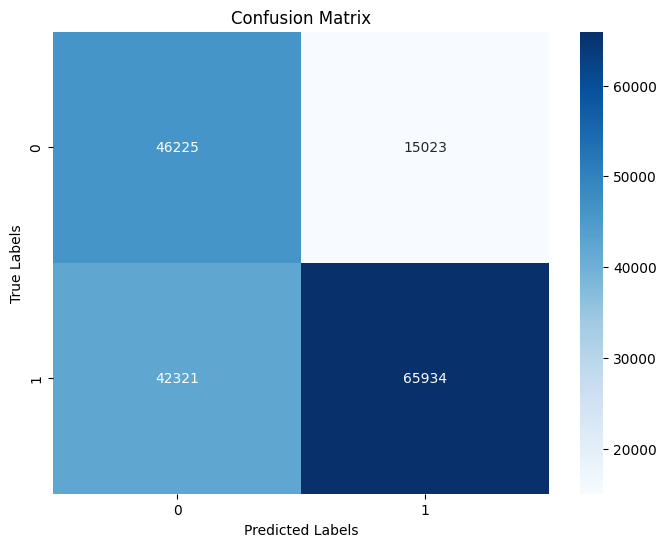


Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.75      0.62     61248
           1       0.81      0.61      0.70    108255

    accuracy                           0.66    169503
   macro avg       0.67      0.68      0.66    169503
weighted avg       0.71      0.66      0.67    169503



In [58]:
from sklearn.metrics import classification_report

model.plot_confusion_matrix(X_test, y_test, labels=[0, 1])

y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Decision Tree (50 points)

In this section, you will implement a **Decision Tree (DT)** from scratch. We will use the [Bank Marketing Dataset from the UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains a mix of **numerical** and **non-numerical** features.


### Libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

First, let's load the dataset and inspect it:

In [65]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv


In [66]:
import io

df = pd.read_csv(io.BytesIO(uploaded['bank.csv']), sep=";")

print("Dataset Head:")
print(df.head())

Dataset Head:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


### Implementation (20 points)

You will implement a class for a **Decision Tree** that includes:
1. **Entropy (H)** calculation.
2. **Information Gain (IG)** computation.
3. A method to split the dataset based on the best feature and decision thresholds.

**Entropy (H):** Entropy is a measure of the impurity or uncertainty of a dataset. It is given by:

$$ H(S) = - \sum_{i=1}^c p_i \log_2(p_i) $$

Where:
- $S$ is the dataset.
- $p_i$ is the proportion of samples in class $i$.
- $c$ is the total number of classes.

**Information Gain (IG):** Information Gain quantifies the reduction in entropy when a dataset is split on a particular feature. It is calculated as:

$$IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:
- $S$ is the dataset.
- $A$ is the feature used for the split.
- $\text{Values}(A)$ are the unique values of feature \(A\).
- $S_v$ is the subset of \(S\) where $A = v$.

The decision tree selects the feature and split point that maximizes the **Information Gain** at each node. The process is repeated recursively until:
1. The node becomes pure (contains only one class).
2. A stopping criterion like **maximum depth** is reached.


In [67]:
class DecisionTree:
    def __init__(self, max_depth=8):
        self.tree = None
        self.max_depth = max_depth

    def entropy(self, y):
        """Calculate the entropy of a dataset."""
        values, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def information_gain(self, X, y, feature_index):
        """Calculate the information gain for a feature."""
        base_entropy = self.entropy(y)
        values, counts = np.unique(X[:, feature_index], return_counts=True)
        weighted_entropy = np.sum([
            (counts[i] / len(X)) * self.entropy(y[X[:, feature_index] == values[i]])
            for i in range(len(values))
        ])
        return base_entropy - weighted_entropy

    def best_feature_to_split(self, X, y):
        """
        Find the best feature to split the dataset.
        Returns the index of the best feature.
        """
        info_gains = [self.information_gain(X, y, i) for i in range(X.shape[1])]
        best_feature = np.argmax(info_gains)
        return best_feature

    def fit(self, X, y, depth=0):
        """
        Fit the decision tree to the training data.
        """
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return np.unique(y)[0]

        best_feature = self.best_feature_to_split(X, y)
        tree = {best_feature: {}}

        values = np.unique(X[:, best_feature])
        for value in values:
            subset_X = X[X[:, best_feature] == value]
            subset_y = y[X[:, best_feature] == value]
            tree[best_feature][value] = self.fit(subset_X, subset_y, depth + 1)

        self.tree = tree
        return tree

    def predict_sample(self, sample, tree):
        """
        Predict the label for a single sample.
        """
        while isinstance(tree, dict):
            feature = list(tree.keys())[0]
            value = sample[feature]
            if value in tree[feature]:
                tree = tree[feature][value]
            else:
                return max(tree[feature].values(), key=lambda v: v if not isinstance(v, dict) else 0)
        return tree

    def predict(self, X):
        """
        Predict the labels for a dataset.
        """
        predictions = [self.predict_sample(sample, self.tree) for sample in X]
        return predictions

### Testing (5 points)

Initially, we will treat **all features uniformly**, regardless of whether they are numerical or categorical. For example:
- The `month` column (categorical) and the `balance` column (continuous numerical) will both be handled the same way.

Now let's test the accuracy of model on dataset

In [68]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])

X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

dt = DecisionTree(max_depth=5)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy:.2f}")

Accuracy of the Decision Tree: 0.47


**Could you explain why is the Accuracy Poor?**

1_ **Label Encoding Issues** : Treating categorical data as ordinal introduces false numerical relationships. **Solution**: Use One-Hot Encoding for categorical features.

2_ **Continuous Feature Handling** : Numerical features are treated as discrete, limiting effective splits. **Solution**: Implement threshold-based splits for numerical features.

3_ **Overfitting** : Tree depth ***(max_depth=5)*** may cause overfitting. **Solution**: Use pruning techniques or cross-validation to optimize depth.

4_ **Data Imbalance** : Unequal class distribution may bias predictions. **Solution**: Apply resampling methods like SMOTE or stratified sampling.

5_ **Missing Key Errors** : Unseen test values default to a fallback, introducing inaccuracies. **Solution**: Improve fallback logic for unseen categories.

### Improved DT implementation (20 points)

In the previous implementation, all features—both numerical and categorical—were treated in the same way.

#### The Problem with Numerical Features:
Numerical features, like `balance` or `age`, require splitting data into intervals (e.g., "Is `balance > 500`?") rather than treating each unique value as a separate category. By failing to implement **threshold-based splits**, the tree:
- Cannot capture meaningful patterns in continuous data.
- Produces suboptimal splits, reducing accuracy and generalization.

To handle numerical features effectively, we need to:
1. Identify potential thresholds for splitting.
2. Calculate the **information gain** for each threshold.
3. Choose the threshold with the highest information gain.

#### Decision Rule for Numerical Features:
For a numerical feature \( f \), the dataset is split into two subsets:
- **Left subset**: $ X[f] \leq \text{threshold} $
- **Right subset**: $ X[f] > \text{threshold} $

The split maximizes the **Information Gain (IG)**:

$$
IG = H(parent) - \left( \frac{|left|}{|parent|} \cdot H(left) + \frac{|right|}{|parent|} \cdot H(right) \right)
$$

Where:
- $ H $ is the entropy.

**Try implementing the updated class and test it on the dataset again!**


In [69]:
class ImprovedDecisionTree:
    def __init__(self, max_depth=None):
        """
        Initialize the DecisionTree class.
        Args:
            max_depth (int, optional): Maximum depth of the tree. If None, the tree grows fully.
        """
        self.max_depth = max_depth
        self.tree = None

    @staticmethod
    def entropy(y):
        """Calculate the entropy of a dataset."""
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def information_gain(self, y, left_idx, right_idx):
        """Calculate the information gain of a split."""
        H_parent = self.entropy(y)
        H_left = self.entropy(y[left_idx])
        H_right = self.entropy(y[right_idx])

        n = len(y)
        n_left = len(left_idx)
        n_right = len(right_idx)

        return H_parent - (n_left / n * H_left + n_right / n * H_right)

    def find_best_threshold(self, feature_column, y):
        """
        Find the best threshold to split a numerical feature.
        Returns the threshold and corresponding information gain.
        """
        sorted_indices = np.argsort(feature_column)
        sorted_feature = feature_column[sorted_indices]
        sorted_labels = y[sorted_indices]

        best_gain = -1
        best_threshold = None

        for i in range(1, len(sorted_feature)):
            if sorted_feature[i] != sorted_feature[i - 1]:
                threshold = (sorted_feature[i] + sorted_feature[i - 1]) / 2
                left_idx = np.where(feature_column <= threshold)[0]
                right_idx = np.where(feature_column > threshold)[0]
                gain = self.information_gain(y, left_idx, right_idx)

                if gain > best_gain:
                    best_gain = gain
                    best_threshold = threshold

        return best_threshold, best_gain

    def best_feature_to_split(self, X, y):
        """
        Determine the best feature and threshold to split the dataset.
        Returns the index of the best feature and the optimal threshold.
        """
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature_idx in range(X.shape[1]):
            feature_column = X[:, feature_idx]
            if np.issubdtype(feature_column.dtype, np.number):
                threshold, gain = self.find_best_threshold(feature_column, y)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold
            else:
                unique_values = np.unique(feature_column)
                for value in unique_values:
                    left_idx = np.where(feature_column == value)[0]
                    right_idx = np.where(feature_column != value)[0]
                    gain = self.information_gain(y, left_idx, right_idx)
                    if gain > best_gain:
                        best_gain = gain
                        best_feature = feature_idx
                        best_threshold = value

        return best_feature, best_threshold

    def fit(self, X, y, depth=0):
        """
        Fit the decision tree to the training data.
        """
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return np.unique(y, return_counts=True)[0][np.argmax(np.unique(y, return_counts=True)[1])]

        best_feature, best_threshold = self.best_feature_to_split(X, y)

        if best_feature is None:
            return np.unique(y, return_counts=True)[0][np.argmax(np.unique(y, return_counts=True)[1])]

        tree = {"feature": best_feature, "threshold": best_threshold, "left": None, "right": None}

        if np.issubdtype(X[:, best_feature].dtype, np.number):
            left_idx = np.where(X[:, best_feature] <= best_threshold)[0]
            right_idx = np.where(X[:, best_feature] > best_threshold)[0]
        else:
            left_idx = np.where(X[:, best_feature] == best_threshold)[0]
            right_idx = np.where(X[:, best_feature] != best_threshold)[0]

        tree["left"] = self.fit(X[left_idx, :], y[left_idx], depth + 1)
        tree["right"] = self.fit(X[right_idx, :], y[right_idx], depth + 1)

        return tree

    def predict_sample(self, sample, tree):
        """
        Predict the label for a single sample by traversing the tree.
        """
        if not isinstance(tree, dict):
            return tree

        feature = tree["feature"]
        threshold = tree["threshold"]

        if np.issubdtype(sample[feature].dtype, np.number):
            if sample[feature] <= threshold:
                return self.predict_sample(sample, tree["left"])
            else:
                return self.predict_sample(sample, tree["right"])
        else:
            if sample[feature] == threshold:
                return self.predict_sample(sample, tree["left"])
            else:
                return self.predict_sample(sample, tree["right"])

    def predict(self, X):
        """
        Predict the labels for a dataset.
        """
        return np.array([self.predict_sample(sample, self.tree) for sample in X])

### Testing (5 points)

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])

X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

tree = ImprovedDecisionTree(max_depth=3)
tree.tree = tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Improved Decision Tree: {accuracy:.2f}")


Accuracy of the Improved Decision Tree: 0.88


**Why did the accuracy improve? What role do numerical features like `balance` and `age` play in the prediction task? Why does treating them properly—using threshold-based splits—make such a difference in the model's performance?**

The accuracy improved because the updated implementation properly handles **numerical features** using **threshold-based splits** rather than treating them as categorical variables. This approach captures patterns and trends in continuous data more effectively, leading to better splits and higher information gain.


**Impact of Numerical Features:**

Numerical features, such as **balance** and **age**, often exhibit gradual variations that influence predictions. For example:

1_ **Age** may affect outcomes incrementally, where older individuals may behave differently than younger ones.

2_ **Balance** may correlate with financial stability, influencing decisions like loan approvals.


**Impact of Threshold-Based Splits:**

1_ **Better Representation**: Instead of dividing data into arbitrary categories, thresholds split numerical features at meaningful points (e.g., balance > 500).  

2_ **Improved Information Gain**: The algorithm maximizes the reduction in entropy by focusing on meaningful splits, leading to purer nodes.  

3_ **Higher Generalization**: The tree captures trends and patterns in numerical data without overfitting to unique values.  
